Experimenting with the Keras API and Tensorflow following this YouTube course https://www.youtube.com/watch?v=qFJeN9V1ZsI sponsored or created by https://deeplizard.com/  This is definitely a very good introduction course.

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

In [4]:
# Targets: 1 = experienced side effects, 2 = did not experience side effects
# 5% of younger people experienced side effects, 5% of older people did not experience side effects
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [5]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, input_shape=(1,), activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.6485 - accuracy: 0.5586
Epoch 2/30
210/210 - 0s - loss: 0.6226 - accuracy: 0.6357
Epoch 3/30
210/210 - 0s - loss: 0.5932 - accuracy: 0.6890
Epoch 4/30
210/210 - 0s - loss: 0.5564 - accuracy: 0.7562
Epoch 5/30
210/210 - 0s - loss: 0.5252 - accuracy: 0.7871
Epoch 6/30
210/210 - 0s - loss: 0.4955 - accuracy: 0.8176
Epoch 7/30
210/210 - 0s - loss: 0.4669 - accuracy: 0.8424
Epoch 8/30
210/210 - 0s - loss: 0.4402 - accuracy: 0.8600
Epoch 9/30
210/210 - 0s - loss: 0.4156 - accuracy: 0.8733
Epoch 10/30
210/210 - 0s - loss: 0.3936 - accuracy: 0.8852
Epoch 11/30
210/210 - 0s - loss: 0.3743 - accuracy: 0.8871
Epoch 12/30
210/210 - 0s - loss: 0.3576 - accuracy: 0.8995
Epoch 13/30
210/210 - 0s - loss: 0.3433 - accuracy: 0.9024
Epoch 14/30
210/210 - 0s - loss: 0.3313 - accuracy: 0.9048
Epoch 15/30
210/210 - 0s - loss: 0.3213 - accuracy: 0.9157
Epoch 16/30
210/210 - 0s - loss: 0.3128 - accuracy: 0.9171
Epoch 17/30
210/210 - 0s - loss: 0.3056 - accuracy: 0.9171
Epoch 

This section covers creating a validation set with keras.  If the accuracy and val_accuracy don't correlate, we may have overfitting.

In [14]:
model_with_validation = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, input_shape=(1,), activation='softmax')
])
model_with_validation.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_with_validation.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6625 - accuracy: 0.5608 - val_loss: 0.6395 - val_accuracy: 0.6619
Epoch 2/30
189/189 - 0s - loss: 0.6329 - accuracy: 0.6725 - val_loss: 0.6084 - val_accuracy: 0.7333
Epoch 3/30
189/189 - 0s - loss: 0.6051 - accuracy: 0.7196 - val_loss: 0.5799 - val_accuracy: 0.7619
Epoch 4/30
189/189 - 0s - loss: 0.5773 - accuracy: 0.7571 - val_loss: 0.5500 - val_accuracy: 0.7810
Epoch 5/30
189/189 - 0s - loss: 0.5483 - accuracy: 0.7889 - val_loss: 0.5198 - val_accuracy: 0.8095
Epoch 6/30
189/189 - 0s - loss: 0.5187 - accuracy: 0.8079 - val_loss: 0.4910 - val_accuracy: 0.8333
Epoch 7/30
189/189 - 0s - loss: 0.4894 - accuracy: 0.8349 - val_loss: 0.4620 - val_accuracy: 0.8571
Epoch 8/30
189/189 - 0s - loss: 0.4610 - accuracy: 0.8524 - val_loss: 0.4337 - val_accuracy: 0.8810
Epoch 9/30
189/189 - 0s - loss: 0.4344 - accuracy: 0.8735 - val_loss: 0.4084 - val_accuracy: 0.8857
Epoch 10/30
189/189 - 0s - loss: 0.4101 - accuracy: 0.8794 - val_loss: 0.3851 - val_accuracy: 0.8857

Testing the models

In [18]:
test_labels = []
test_samples = []
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

In [19]:
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [20]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [30]:
predictions = model_with_validation.predict(x=scaled_test_samples, batch_size=10, verbose=0) # Inference

In [27]:
for i in predictions:
    print(i)

[0.9564281  0.04357193]
[0.04885995 0.95114005]
[0.29790947 0.7020905 ]
[0.9554677  0.04453233]
[0.06386521 0.93613476]
[0.02465047 0.97534955]
[0.0230014 0.9769986]
[0.95485115 0.04514891]
[0.95650804 0.04349193]
[0.9539484  0.04605162]
[0.9000157  0.09998431]
[0.95372    0.04627999]
[0.95485115 0.04514891]
[0.07288974 0.9271103 ]
[0.03031845 0.9696815 ]
[0.9563498  0.04365018]
[0.03986819 0.96013176]
[0.02830123 0.9716987 ]
[0.02465047 0.97534955]
[0.63105243 0.36894754]
[0.03477872 0.9652213 ]
[0.9483973 0.0516027]
[0.02830123 0.9716987 ]
[0.9560463  0.04395369]
[0.9544246  0.04557539]
[0.03031845 0.9696815 ]
[0.8733314  0.12666851]
[0.95650804 0.04349193]
[0.74919766 0.25080234]
[0.9509657  0.04903433]
[0.03723996 0.96276003]
[0.9440046  0.05599543]
[0.07791327 0.92208666]
[0.3278618 0.6721383]
[0.9544246  0.04557539]
[0.66287565 0.33712432]
[0.04885995 0.95114005]
[0.0230014 0.9769986]
[0.1378721 0.8621279]
[0.66287565 0.33712432]
[0.08348417 0.9165158 ]
[0.598047   0.40195295]
[0

In [28]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [29]:
for i in rounded_predictions:
    print(i)

0
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
0
1
1
1
0
1
0
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
0
0
0
1
0
1
1
1
1
0
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
0
0
1
0
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
0
0
1
1
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
1
0
0
0
0
1
1
0
1
1
1
1
0
1
0
1
0
1
0
1
0
0
1
1
0
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
1
1
0
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
1
1
0
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
0
0
1
1
1
1
1
1
0
1
0
0
1
1
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
1
1
1
0
1
0
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
1
1
0
1
1
0
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
0
0
0
1
1
1
1
0
1
1
1
1
0
0
0
0
1
1
0
1
1
0


Confusion matrix to visualize prediction results

In [37]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [33]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [34]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[189  21]
 [  9 201]]


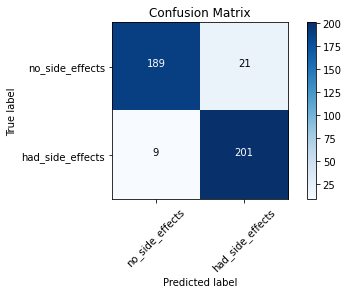

In [38]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')